<a href="https://colab.research.google.com/github/FedeSalvemini/ARCHIVOS-DA/blob/main/Dataset_Salvemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science CoderHouse 61750



### Alumno: Federico Salvemini

##Introducción
La predicción de costos en campañas de adquisición de clientes es crucial para las cadenas de supermercados, especialmente en un mercado tan competitivo como el de Estados Unidos. La capacidad de estimar con precisión los costos asociados a dichas campañas permite a los supermercados optimizar sus estrategias de marketing, asignar recursos de manera más eficiente y maximizar el retorno de inversión. En este contexto, el presente trabajo se enfoca en explorar un conjunto de datos relacionado con campañas de adquisición de clientes y construir un modelo de regresión para predecir el costo de estas campañas. Este análisis no solo contribuirá a una mejor planificación y ejecución de campañas, sino que también ayudará a las cadenas de supermercados a tomar decisiones más informadas y efectivas en sus esfuerzos por captar nuevos clientes.

## Descripción del Problema

Los costos imprecisos pueden llevar a una asignación ineficiente de recursos y a un retorno de inversión subóptimo. Identificar los factores que afectan estos costos y desarrollar modelos predictivos precisos es esencial para tomar decisiones y optimizar las estrategias de marketing. En este contexto, el análisis de datos y la construcción de modelos de regresión pueden proporcionar insights valiosos sobre las variables que más impactan en los costos de adquisición y el tipo de promocion aplicada. Esto permitirá a los supermercados ajustar sus campañas de manera más efectiva, asegurando que los recursos se utilicen de la mejor manera posible para maximizar la eficiencia y el rendimiento de las campañas de marketing.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de regresión que pueda predecir con precisión el costo de las campañas de adquisición de clientes. Tambien se puede ver desde la otra perspectiva positiva y estimar un modelo que nos diga el costo segun la cantidad de nuevos clientes que queremos atraer. Para lograr este objetivo, se explorará un conjunto de datos relacionado con estas campañas, se realizará un análisis exploratorio de los datos para comprender mejor las características y patrones presentes, y se construirá y evaluará el rendimiento de varios modelos de regresión


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/code/mayurspawar/customer-acquisition-prediction/notebook

Este conjunto de datos proporciona información detallada sobre unidad de negocio ( departamento/categoria), informacion sobre el cliente e informacion del tipo de tiendas segun promoción

## Importación de Librerías y Carga de Datos


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('/content/media prediction and its cost.csv')

## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

El conjunto de datos contiene un total de 60.428 filas (registros) y 40 columnas, de las cuales se pueden divir entre referidas al tipo de negocio, referidas a datos categoricos del clientes, catericos sobre el tipo de store y numericas

La col avg_cars_at home(approx), se encuentra duplicada, se puede eliminar una de ellas.

Se observa que que todas las columnas tienen la misma cantidad de datos, no habiendo, en principio ningun, Nulo (re-check abajo).

---



**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir el costo de una campaña para acaparar un cierto numeros de clientes. "food_category","store_sales(in millions)","unit_sales(in millions)","promotion_name","sales_country","marital_status","gender","avg. yearly_income","SRP ( Precio de venta Sugerido)","brand_name","store_type","media_type","cost"


In [77]:
#Check valores nulos
for col in df.columns: # Change 'columns' to 'df.columns'
    print(f"Column {col}: {df[col].isnull().sum() + (df[col] == '').sum()} missing values")

Column food_category: 0 missing values
Column food_department: 0 missing values
Column food_family: 0 missing values
Column store_sales(in millions): 0 missing values
Column store_cost(in millions): 0 missing values
Column unit_sales(in millions): 0 missing values
Column promotion_name: 0 missing values
Column sales_country: 0 missing values
Column marital_status: 0 missing values
Column gender: 0 missing values
Column total_children: 0 missing values
Column education: 0 missing values
Column member_card: 0 missing values
Column occupation: 0 missing values
Column houseowner: 0 missing values
Column avg_cars_at home(approx): 0 missing values
Column avg. yearly_income: 0 missing values
Column num_children_at_home: 0 missing values
Column avg_cars_at home(approx).1: 0 missing values
Column brand_name: 0 missing values
Column SRP: 0 missing values
Column gross_weight: 0 missing values
Column net_weight: 0 missing values
Column recyclable_package: 0 missing values
Column low_fat: 0 missing

CONFIRMADO, Sin valores Nulos ni Vacios

In [78]:
df.shape

(60428, 40)

In [79]:
df.duplicated().sum()

0

Sin filas duplicadas

In [80]:
# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)  # Configurar pandas para mostrar todas las columnas
df.head(20)  # Mostrar el DataFrame con todas las columnas

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
5,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Double Down Sale,USA,M,F,2.0,Bachelors Degree,Bronze,Professional,N,1.0,$50K - $70K,2.0,1.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
6,Breakfast Foods,Frozen Foods,Food,5.44,2.5568,4.0,Cash Register Lottery,USA,S,F,4.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
7,Breakfast Foods,Frozen Foods,Food,3.74,1.6082,2.0,Cash Register Lottery,USA,S,M,1.0,Partial High School,Bronze,Manual,Y,4.0,$50K - $70K,0.0,4.0,Imagine,1.87,16.70,14.70,1.0,1.0,10.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
8,Breakfast Foods,Frozen Foods,Food,4.08,1.4688,3.0,Cash Register Lottery,USA,S,F,2.0,Partial High School,Normal,Skilled Manual,N,2.0,$10K - $30K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
9,Breakfast Foods,Frozen Foods,Food,9.72,4.5684,3.0,High Roller Savings,USA,S,F,3.0,Graduate Degree,Bronze,Professional,N,1.0,$70K - $90K,0.0,1.0,Big Time,3.24,16.30,14.20,1.0,0.0,25.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16


Cada fila en el DataFrame representa una nueva transacción realizada por un cliente diferente. Cada una de estas transacciones incluye detalles sobre:

Producto comprado: La categoría, departamento, y familia del alimento.

Ventas y costos de la tienda: Las ventas y costos relacionados con esa transacción específica.

Ventas unitarias: Cantidad de unidades vendidas.

Promoción aplicada: Nombre de la promoción que pudo haber influido en la venta.

Información del cliente: Incluye datos demográficos como país, estado civil, género, educación, ocupación, etc.

Características de la tienda: Detalles como tipo de tienda, ubicación, tamaño de la tienda y características adicionales como barra de café, floristería, etc.

Costos y precios del producto: Incluye el precio sugerido al por menor, peso bruto y neto, etc.


Existen muchas columnas categoricas sobre las carecteriticas de la tienda/store, que hacen el Df muy ancho. Hay 5 columnas,*coffee_bar,video_store,salad_bar,prepared_food,florist* de True/False que hablan sobre caracteristicas de la tienda que se pueden ELIMINAR.

Luego hay 3 columnas que hablan sobre la cantidad de metros2 para cada sector, tambien entiendo, no son redudantes (*grocery_sqft,frozen_sqft,meat_sqft*).
En cuanto a caracteristicas de producto tambien hay varias columnas True/False que se pueden obviar. (*low_fat,recyclable_package*), Columnas sobre el peso del prodducto (*net_weight ,gross_weight*).

Sobre la informacion del cliente atraido, considero que no suman al ejercicio ( a*vg_cars_at home(approx), houseowner,occupation,member_card,education,num_children_at_home*), entiendo se puede saber el Status de la persona con la informacion de la columna: avg. yearly_income.

En geografia se puede eliminar *store_city*, por ser muy granular, a evaluar en futuros analisis , store_state.

Por ahora entonces, y en post de achicar el DF, voy a analizar el mismo con las 17 columnas restantes.

In [81]:
df=df.drop(columns=['education','member_card','occupation','houseowner','avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1','gross_weight','net_weight','recyclable_package','low_fat','store_city','grocery_sqft','frozen_sqft','meat_sqft','coffee_bar','video_store','salad_bar','prepared_food','florist'])

In [82]:
# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)  # Configurar pandas para mostrar todas las columnas
df.head(100)  # Mostrar el DataFrame con todas las columnas

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,avg. yearly_income,brand_name,SRP,units_per_case,store_type,store_state,store_sqft,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,$10K - $30K,Carrington,1.84,17.0,Deluxe Supermarket,OR,27694.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,$50K - $70K,Carrington,1.84,17.0,Deluxe Supermarket,OR,27694.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,$10K - $30K,Carrington,1.84,17.0,Deluxe Supermarket,OR,27694.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,$30K - $50K,Carrington,1.84,17.0,Deluxe Supermarket,OR,27694.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,$30K - $50K,Golden,1.36,29.0,Deluxe Supermarket,OR,27694.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Breakfast Foods,Frozen Foods,Food,11.22,3.8148,6.0,One Day Sale,USA,S,F,5.0,$30K - $50K,Imagine,1.87,10.0,Gourmet Supermarket,CA,23688.0,"Daily Paper, Radio, TV",85.88
96,Breakfast Foods,Frozen Foods,Food,12.96,4.9248,4.0,One Day Sale,USA,M,M,0.0,$30K - $50K,Big Time,3.24,25.0,Gourmet Supermarket,CA,23688.0,"Daily Paper, Radio, TV",85.88
97,Breakfast Foods,Frozen Foods,Food,5.44,2.0128,4.0,One Day Sale,USA,S,F,1.0,$110K - $130K,Golden,1.36,29.0,Gourmet Supermarket,CA,23688.0,"Daily Paper, Radio, TV",85.88
98,Breakfast Foods,Frozen Foods,Food,9.72,4.2768,3.0,Sales Galore,USA,M,F,4.0,$30K - $50K,Big Time,3.24,25.0,Gourmet Supermarket,CA,23688.0,Bulk Mail,96.55


# **Descripcion de columnas categoricas:**

In [83]:
columns=['food_category','food_department','food_family','promotion_name','sales_country','marital_status','gender','avg. yearly_income','brand_name','store_type','store_state','media_type']
for col in columns: # Change 'columns' to 'df.columns'
    print(f"Column {col}: {df[col].unique()} missing values")


Column food_category: ['Breakfast Foods' 'Bread' 'Canned Shrimp' 'Baking Goods' 'Vegetables'
 'Frozen Desserts' 'Candy' 'Snack Foods' 'Dairy' 'Starchy Foods'
 'Cleaning Supplies' 'Decongestants' 'Meat' 'Hot Beverages'
 'Jams and Jellies' 'Carbonated Beverages' 'Seafood' 'Specialty'
 'Kitchen Products' 'Electrical' 'Beer and Wine' 'Candles' 'Fruit'
 'Pure Juice Beverages' 'Canned Soup' 'Paper Products' 'Canned Tuna'
 'Eggs' 'Hardware' 'Canned Sardines' 'Canned Clams' 'Pain Relievers'
 'Side Dishes' 'Bathroom Products' 'Magazines' 'Frozen Entrees' 'Pizza'
 'Cold Remedies' 'Canned Anchovies' 'Drinks' 'Hygiene' 'Plastic Products'
 'Canned Oysters' 'Packaged Vegetables' 'Miscellaneous'] missing values
Column food_department: ['Frozen Foods' 'Baked Goods' 'Canned Foods' 'Baking Goods' 'Produce'
 'Snacks' 'Snack Foods' 'Dairy' 'Starchy Foods' 'Household'
 'Health and Hygiene' 'Meat' 'Beverages' 'Seafood' 'Deli'
 'Alcoholic Beverages' 'Canned Products' 'Eggs' 'Periodicals'
 'Breakfast Foods' '

In [84]:
columns = ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'avg. yearly_income', 'brand_name', 'store_type', 'store_state', 'media_type']

# Recorremos cada columna y formateamos los datos
for col in columns:
    print(f'\n--- {col} ---')
    unique_values = df[col].value_counts()
    for value, count in unique_values.items():
        print(f'{value} ({count})')





--- food_category ---
Vegetables (7440)
Snack Foods (6919)
Dairy (3835)
Meat (3107)
Fruit (3080)
Jams and Jellies (2550)
Baking Goods (1947)
Breakfast Foods (1946)
Bread (1797)
Canned Soup (1722)
Beer and Wine (1590)
Paper Products (1568)
Bathroom Products (1552)
Electrical (1544)
Candy (1538)
Frozen Desserts (1446)
Specialty (1174)
Starchy Foods (1103)
Magazines (971)
Kitchen Products (969)
Eggs (952)
Hot Beverages (891)
Hygiene (831)
Pain Relievers (828)
Pizza (821)
Carbonated Beverages (782)
Pure Juice Beverages (760)
Cleaning Supplies (748)
Side Dishes (601)
Frozen Entrees (595)
Drinks (581)
Plastic Products (578)
Hardware (575)
Cold Remedies (399)
Decongestants (396)
Canned Tuna (395)
Seafood (375)
Canned Anchovies (213)
Canned Clams (199)
Candles (195)
Miscellaneous (194)
Canned Oysters (189)
Canned Shrimp (182)
Packaged Vegetables (179)
Canned Sardines (171)

--- food_department ---
Produce (8521)
Snack Foods (6919)
Household (6185)
Frozen Foods (6126)
Baking Goods (4497)
Canne

# **Analisís de columnas cuantitativas:**

In [85]:

pd.set_option('display.max_columns', None)  # Configurar pandas para mostrar todas las columnas
df.describe().round(2)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,SRP,units_per_case,store_sqft,cost
count,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00,60428.00
mean,6.54,2.62,3.09,2.53,2.12,18.86,27988.48,99.26
std,3.46,1.45,0.83,1.49,0.93,10.26,5701.02,30.01
min,0.51,0.16,1.00,0.00,0.50,1.00,20319.00,50.79
25%,3.81,1.50,3.00,1.00,1.41,10.00,23593.00,69.65
50%,5.94,2.39,3.00,3.00,2.13,19.00,27694.00,98.52
75%,8.67,3.48,4.00,4.00,2.79,28.00,30797.00,126.62
max,22.92,9.73,6.00,5.00,3.98,36.00,39696.00,149.75






**Cost:**
- El costo de "traer" un nuevo cliente en promedio es de 99USD, el cual se habla muy bien con la Mediana en 98,5USD
- La variabilidad en cost (50.79 a 149.75 dólares) indica que hay una amplia gama de costos asociados con diferentes promociones.


**store_sales(in millions):**
- Podemos considerar el max 22.920000, como un outlier en comparacion con el promedio

**store_cost(in millions):**
 Idem con store_ sales, gran diferencia, incluso % mayor entre el max cost y el mean de los datos.

 La similitud entre la mediana y la media en varias columnas (por ejemplo, **store_sales, store_cost, unit_sales**) sugiere que estas distribuciones pueden ser aproximadamente simétricas.

**total_children:**
- El promedio de hijos de los clientes es de 2,5. levemente inclinado hacia el cuartil 25%-50%. Posible sesgo a la izquierda

**store_sqft:**
- Tiene un rango considerable (20,319 a 39,696 pies cuadrados), lo que sugiere que hay una variedad de tamaños de tienda en el dataset, lo cual puede influir en las ventas y los costos.

La alta variabilidad (alto desvio standar) en **store_sales y store_cost** podría indicar que las ventas y los costos son muy sensibles a las promociones y otras variables contextuales.

En cambio la baja variabilidad en **unit_sales**, pero ser indicio que las ventas y costos esten altamente afectados por promociones.

### Hipótesis planteadas

1.   Los clientes de ingresos mas altos, son captados en Delux Supermarket
2.   El costo promedio de captar un cliente aumenta linealmente con sus ingresos
3.   La promocion "weekend Markdown" (promocion con mas casos),  es aprovechada en su mayoria por personas casadas
4.   El costo promedio disminuye segun tamaño incremental de la tienda
5.   USA es el pais con mas tiendas, y dentro de cada tipo de tiendas, tambine el pais con mas tiendas en cada division, despues le sigue Mexico






# **1. Los clientes de ingresos mas altos, son captados en Delux Supermarket**

<ipython-input-86-64e3908fb0fa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='store_type', y='counts', data=store_type_counts, palette='viridis')


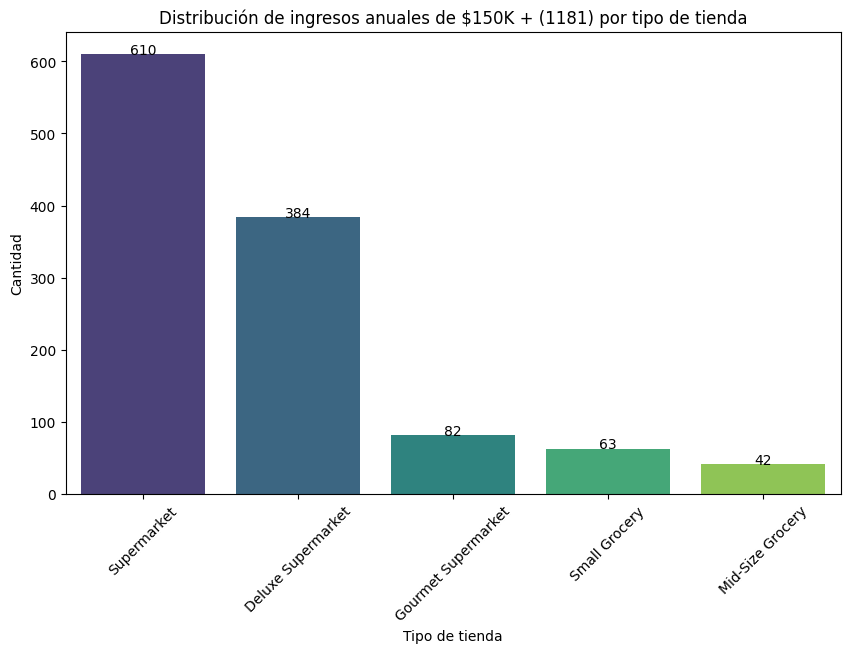

In [86]:
# Filtramos los datos para el ingreso anual '$150K + (1181)'
filtered_df = df[df['avg. yearly_income'] == '$150K +']

# Contamos las ocurrencias de cada tipo de tienda
store_type_counts = filtered_df['store_type'].value_counts().reset_index()
store_type_counts.columns = ['store_type', 'counts']

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='store_type', y='counts', data=store_type_counts, palette='viridis')

# Agregar los valores a las barras
for index, row in store_type_counts.iterrows():
    barplot.text(row.name, row.counts, round(row.counts, 2), color='black', ha="center")

plt.title("Distribución de ingresos anuales de $150K + (1181) por tipo de tienda")
plt.xlabel("Tipo de tienda")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()



Mi hipotesis  o razonamiento no es correcto. Los clientes de mayor ingresos (1181 casos) son captados en supermekarket, este tipo de tienda representa representa aprox el 50% de los casos. Dejando Deluxe Supermarket en 2do lugar.

# **2. El costo promedio de captar un cliente aumenta linealmente con sus ingresos**


0  valores faltantes en la columna 'cost'
  avg. yearly_income        cost
0        $10K - $30K   99.329848
1        $30K - $50K   99.434719
2        $50K - $70K  100.065537
3        $70K - $90K   98.014146
4       $90K - $110K   99.641838
5      $110K - $130K   98.909347
6      $130K - $150K   98.319229
7            $150K +   99.129356


<ipython-input-87-69dca8a50c36>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('avg. yearly_income')['cost'].mean().reset_index()
<ipython-input-87-69dca8a50c36>:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='avg. yearly_income', y='cost', data=grouped_df, palette='viridis')


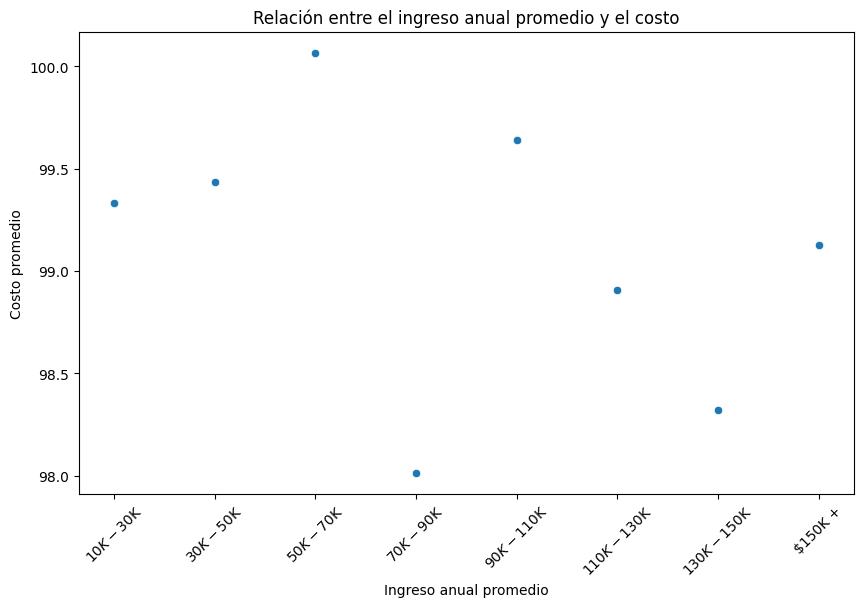

In [87]:
# Ordenamos las categorías de ingreso anual promedio para una mejor visualización
income_order = ["$10K - $30K", "$30K - $50K", "$50K - $70K", "$70K - $90K", "$90K - $110K", "$110K - $130K",'$130K - $150K',"$150K +"]
df['avg. yearly_income'] = pd.Categorical(df['avg. yearly_income'], categories=income_order, ordered=True)

# Convertimos 'cost' a numérico, forzando errores a NaN y eliminando los NaN
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

# Verificamos si hay valores NaN y l os eliminamos
print(df['cost'].isna().sum(), " valores faltantes en la columna 'cost'")

# Eliminamos las filas donde 'cost' es NaN
df = df.dropna(subset=['cost'])

# Agrupamos por 'avg. yearly_income' y calculamos el costo promedio
grouped_df = df.groupby('avg. yearly_income')['cost'].mean().reset_index()

# Verificamos los datos agrupados
print(grouped_df)

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg. yearly_income', y='cost', data=grouped_df, palette='viridis')

plt.title('Relación entre el ingreso anual promedio y el costo')
plt.xlabel('Ingreso anual promedio')
plt.ylabel('Costo promedio')
plt.xticks(rotation=45)
plt.show()



A simple vista, la correlacion no tiene sentido positivo ni negativo, los clientes del segmento 50k-70k( uno de los segmentos mas bajos) son los mas caros. Y el siguiente segmento de 70k a 90k, el mas barato, junto con los de 130-150 que es el anteultimo segmento. Los clientes del segmento mas premiun tienen un costo alineado con la media

# **3. La promocion "weekend Markdown" (promocion con mas casos),  es aprovechada en su mayoria por personas casadas**


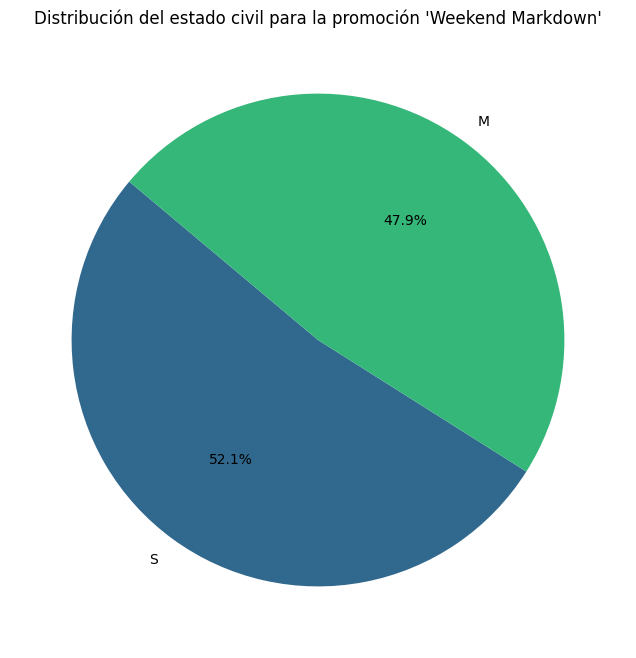

In [88]:

# Filtramos los datos para la promoción "Weekend Markdown"
filtered_df = df[df['promotion_name'] == 'Weekend Markdown']

# Contamos las ocurrencias de cada estado civil
marital_status_counts = filtered_df['marital_status'].value_counts().reset_index()
marital_status_counts.columns = ['marital_status', 'counts']

# Creamos el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts['counts'], labels=marital_status_counts['marital_status'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(marital_status_counts)))
plt.title("Distribución del estado civil para la promoción 'Weekend Markdown'")
plt.show()





La promocion weekend Markdown (promocion con mas casos = 2330) no tiene una tendencia clara entre Single y Marital. Este corte de informacion respeta la proporcion 50% entre S/M que en general, en los 60k casos, tienen los datos.

# **4. El costo promedio disminuye segun tamaño incremental de la tienda**



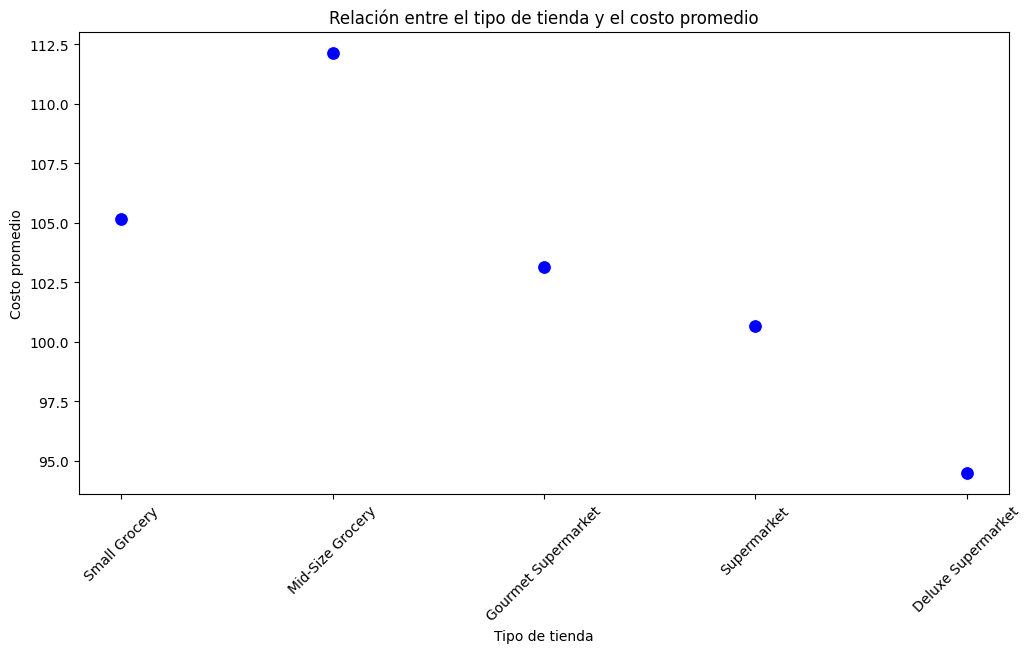

In [89]:

# Definimos el orden de los tipos de tienda
store_type_order = ['Small Grocery', 'Mid-Size Grocery', 'Gourmet Supermarket', 'Supermarket', 'Deluxe Supermarket']

# Agrupamos por 'store_type' y calculamos el costo promedio
grouped_df = df.groupby('store_type')['cost'].mean().reset_index()

# Convertimos 'store_type' a una categoría ordenada
grouped_df['store_type'] = pd.Categorical(grouped_df['store_type'], categories=store_type_order, ordered=True)

# Ordenamos el DataFrame según el tipo de tienda
grouped_df = grouped_df.sort_values('store_type')

# Creamos el gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='store_type', y='cost', data=grouped_df, s=100, color='b', marker='o')

plt.title('Relación entre el tipo de tienda y el costo promedio')
plt.xlabel('Tipo de tienda')
plt.ylabel('Costo promedio')
plt.xticks(rotation=45)
plt.show()



Si consideramos que el eje X esta ordenado de menor a mayor tamaño, en general de las tiendas, quitando el outlier "mid-size Grocery"( que resulta ser el mas caro), para el resto de los puntos hay cierta linea con pendiente negativa que pódria sustentar la hipotesis, teniendo en cuenta q mayor tamaño mayor infraestructura para licuar costo

# **5. USA es el pais con mas tiendas, y dentro de cada tipo de tiendas, tambine el pais con mas tiendas en cada division, despues le sigue Mexico**


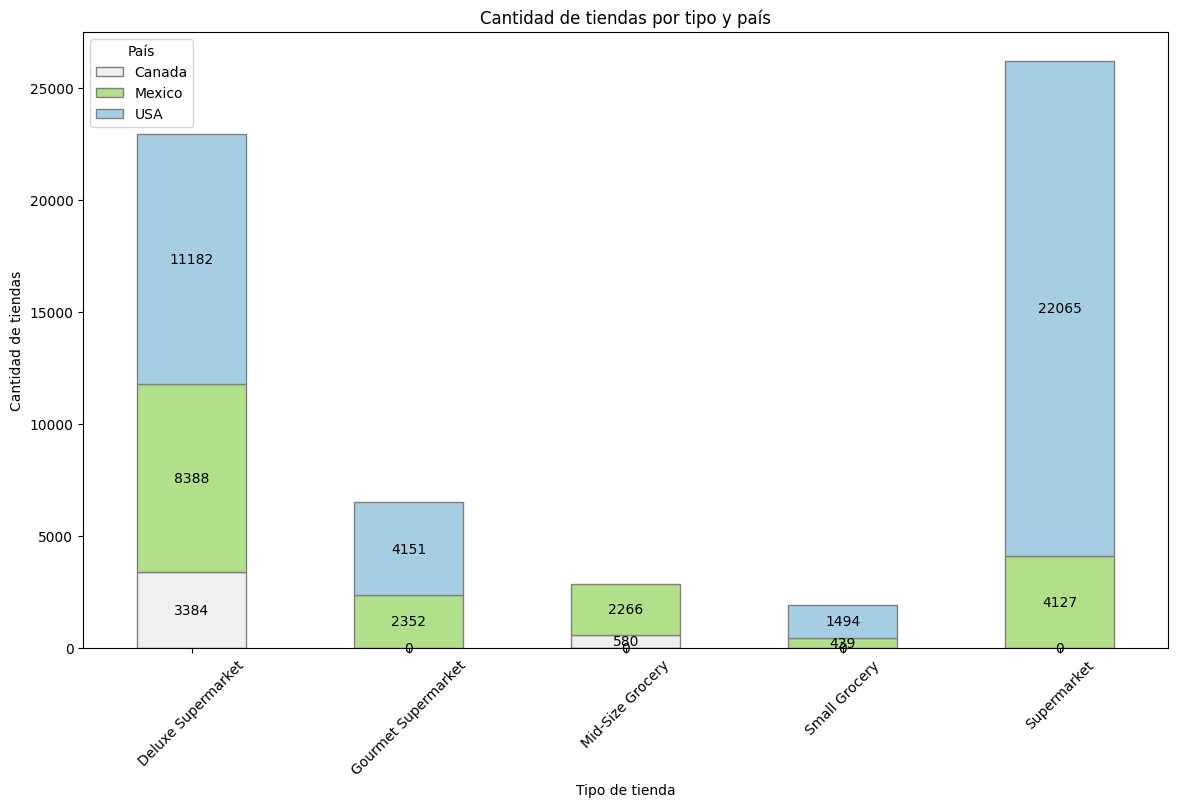

In [90]:
# Contamos la cantidad de tiendas por 'store_type' y 'sales_country'
store_country_counts = df.groupby(['store_type', 'sales_country']).size().reset_index(name='counts')

# Pivotamos el DataFrame para que 'sales_country' sea las columnas
store_country_pivot = store_country_counts.pivot(index='store_type', columns='sales_country', values='counts').fillna(0)

# Colores personalizados suaves
colors = {'USA': '#a6cee3', 'Canada': '#f0f0f0', 'Mexico': '#b2df8a'}

# Crear la lista de colores según el país
color_list = [colors[country] for country in store_country_pivot.columns]

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8))
store_country_pivot.plot(kind='bar', stacked=True, color=color_list, edgecolor='grey', ax=ax)

# Agregar los valores numéricos a cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Personalizar el gráfico
plt.title('Cantidad de tiendas por tipo y país')
plt.xlabel('Tipo de tienda')
plt.ylabel('Cantidad de tiendas')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.show()





Si bien es correcto decir que USA es el pais con mas tiendas dentro de la muestra seguido por Mexico. Lo que no es correcto es q es el pais con mas tiendas tambien dentro de cada segmento. para serlo le falta tener tiendas en la categoria Mid-Size Greocery en la cual no tiene.